# Motion across sessions - comparisson with the cemented dataset

These will go in sup, perhaps all combined would be nice.

In [1]:
from labdata.schema import *
import pylab as plt
%matplotlib widget
from labdata import chronic_paper as paper
plt.matplotlib.rcParams['pdf.fonttype'] = 42
plt.matplotlib.rcParams['ps.fonttype'] = 42
savepath = Path('../../figures/figure3')
savepath.mkdir(parents = True,exist_ok = True)


[2024-05-29 17:30:55,676][INFO]: Connecting admin@churchland-data.cmojfwfr0b9t.us-west-2.rds.amazonaws.com:3306
[2024-05-29 17:30:56,101][INFO]: Connected admin@churchland-data.cmojfwfr0b9t.us-west-2.rds.amazonaws.com:3306


(4200.0, 5200.0)

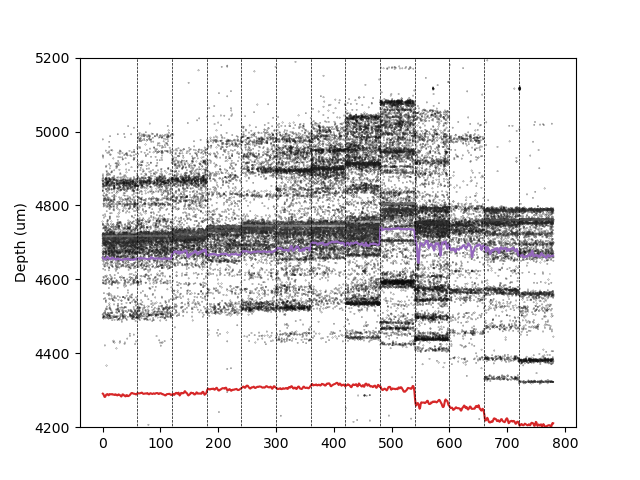

In [2]:
%matplotlib widget
key = dict(subject_name="_AL031",shank_num=0)
import pylab as plt
plt.figure()
paper.ConcatenatedSpikes().plot_raster(key, corrected=False, overlay_dredge=True,cmap = 'gray')
plt.axis('tight')
plt.ylim(4200, 5200)

In [ ]:
intervals_days = (paper.ConcatenatedSpikes.IncludedRecordings()*Session() & 'subject_name = "_AL031"'& 'shank_num = 0').fetch('session_datetime')
intervals_days = (intervals_days.astype(np.datetime64) - np.datetime64(intervals_days[0]))
intervals_days_cemented = intervals_days.astype('timedelta64[D]') # these are the intervals for which we have _AL036 data


# selected JC131 sessions
intervals_days = (paper.ConcatenatedSpikes.IncludedRecordings()*Session() & 'subject_name = "JC131"'& 'shank_num = 0').fetch('session_datetime')
intervals_days = (intervals_days.astype(np.datetime64) - np.datetime64(intervals_days[0])).astype('timedelta64[D]')
arg_sessions = []
for i in intervals_days_cemented:
    arg_sessions.append(np.where(intervals_days<=i)[0][-1])
arg_sessions
intervals_days,intervals_days_cemented,arg_sessions

In [ ]:
data_AL036 = (paper.ConcatenatedSpikes*paper.ConcatenatedSpikes.DredgeResults & 'subject_name = "_AL036"' & 'shank_num = 0').fetch1()
intervals_days = (paper.ConcatenatedSpikes.IncludedRecordings()*Session() & 'subject_name = "_AL036"'& 'shank_num = 0').fetch('session_datetime')
intervals_days = (intervals_days.astype(np.datetime64) - np.datetime64(intervals_days[0]))
intervals_days_cemented = intervals_days.astype('timedelta64[D]') # these are the intervals for which we have _AL036 data

data_AL036['spike_times_s'] = data_AL036['spike_times_s'].astype(np.float32)
displ = data_AL036['displacement']
sp= data_AL036['spike_times_s']

from spks.viz import plot_drift_raster

plt.figure(figsize = [7,3])
plot_drift_raster(sp,data_AL036['spike_depths_um'],data_AL036['spike_amps'],cmap = 'gray_r',clim = [0,300])

plt.vlines(offsets,3500,4500,'k',lw = 0.5)
plt.ylim([3500,4500])
plt.plot(displ+np.mean([3500,4500]),'r')
offsets = np.hstack([data_AL036['session_breaks'],np.max(sp)])
plt.xticks(offsets - np.mean(np.diff(offsets))/2,[a for a in intervals_days_cemented.astype(int)],rotation = 0,fontsize = 8);
plt.yticks(fontsize = 8)
plt.ylabel("Probe location (um)")
plt.xlabel("Days from first recording");
plt.title('AL036 cortex (shank 0)')
plt.savefig(savepath/f'AL036_shank0_drift.pdf')

In [ ]:
intervals_days = (paper.ConcatenatedSpikes.IncludedRecordings()*Session() & 'subject_name = "JC131"'& 'shank_num = 0').fetch('session_datetime')
intervals_days = (intervals_days.astype(np.datetime64) - np.datetime64(intervals_days[0])).astype('timedelta64[D]')

idx_JC131 = [0,1,8,30,34,46,59,68,76,77,78,84,87]

data_JC131 = (paper.ConcatenatedSpikes*paper.ConcatenatedSpikes.DredgeResults & 'subject_name = "JC131"' & 'shank_num = 0').fetch1()

data_JC131['spike_times_s'] = data_JC131['spike_times_s'].astype(np.float32)
sessiontimes = np.vstack([np.hstack([4,data_JC131['session_breaks']]),
                          np.hstack([data_JC131['session_breaks'],np.max(data_JC131['spike_times_s'])])]).T[idx_JC131]
t = data_JC131['time_bin_centers_s']
displ = data_JC131['displacement'][np.hstack([np.where((t>a) & (t<=b))[0] for a,b in sessiontimes])]
sp= data_JC131['spike_times_s']
idx = [np.where((sp>a) & (sp<=b))[0] for a,b in sessiontimes]

nsp = []
offsets = []
offset = 0
for i in idx:
    nsp.append(sp[i]-sp[i][0]+offset)
    offset = nsp[-1][-1]
    offsets.append(offset)
idx = np.hstack(idx)
from spks.viz import plot_drift_raster

plt.figure(figsize = [7,3])
plot_drift_raster(np.hstack(nsp),data_JC131['spike_depths_um'][idx],data_JC131['spike_amps'][idx],cmap = 'gray_r',clim = [0,300])

plt.vlines(offsets,4200,5200,'k',lw = 0.5)
plt.ylim([4200,5200])
plt.plot(displ+np.mean([4200,5200]),'r')
plt.xticks(offsets - np.mean(np.diff(offsets))/2,[a for a in intervals_days[idx_JC131].astype(int)],rotation = 0,fontsize = 8);
plt.yticks(fontsize = 8)
plt.ylabel("Probe location (um)")
plt.xlabel("Days from first recording");
plt.title('JC131 cortex (shank 0)')
plt.savefig(savepath/f'JC131_shank0_drift.pdf')

In [ ]:
intervals_days = (paper.ConcatenatedSpikes.IncludedRecordings()*Session() & 'subject_name = "JC131"'& 'shank_num = 2').fetch('session_datetime')
intervals_days = (intervals_days.astype(np.datetime64) - np.datetime64(intervals_days[0])).astype('timedelta64[D]')

idx_JC131 = [0,1,8,30,34,46,59,68,76,77,78,84,87]

data_JC131 = (paper.ConcatenatedSpikes*paper.ConcatenatedSpikes.DredgeResults & 'subject_name = "JC131"' & 'shank_num = 2').fetch1()

data_JC131['spike_times_s'] = data_JC131['spike_times_s'].astype(np.float32)
sessiontimes = np.vstack([np.hstack([0,data_JC131['session_breaks']]),
                          np.hstack([data_JC131['session_breaks'],np.max(data_JC131['spike_times_s'])])]).T[idx_JC131]
t = data_JC131['time_bin_centers_s']
displ = data_JC131['displacement'][2][np.hstack([np.where((t>a) & (t<=b))[0] for a,b in sessiontimes])]
sp= data_JC131['spike_times_s']
idx = [np.where((sp>a) & (sp<=b))[0] for a,b in sessiontimes]

nsp = []
offsets = []
offset = 0
for i in idx:
    nsp.append(sp[i]-sp[i][0]+offset)
    offset = nsp[-1][-1]
    offsets.append(offset)
idx = np.hstack(idx)
from spks.viz import plot_drift_raster

plt.figure(figsize = [7,3])
plot_drift_raster(np.hstack(nsp),data_JC131['spike_depths_um'][idx],data_JC131['spike_amps'][idx],cmap = 'gray_r',clim = [0,300])

plt.vlines(offsets,1300,2300,'k',lw = 0.5)
plt.ylim([1300,2300])
plt.plot(displ+np.mean([1300,2300]),'r')
plt.xticks(offsets - np.mean(np.diff(offsets))/2,[a for a in intervals_days[idx_JC131].astype(int)],rotation = 0,fontsize = 8);
plt.yticks(fontsize = 8)
plt.ylabel("Probe location (um)")
plt.xlabel("Days from first recording");
plt.title('JC131 thalamus (shank 2)')
plt.savefig(savepath/f'JC131_shank2_drift.pdf')

In [ ]:
intervals_days = (paper.ConcatenatedSpikes.IncludedRecordings()*Session() & 'subject_name = "MM012"'&
                  'probe_num = 2' & 'shank_num = 0').fetch('session_datetime')
intervals_days = (intervals_days.astype(np.datetime64) - np.datetime64(intervals_days[0])).astype('timedelta64[D]')
idx_MM012 = [0,1,6,18, 19, 20,24,32, 33, 40, 41 ,44,48]
data_MM012 = (paper.ConcatenatedSpikes*paper.ConcatenatedSpikes.DredgeResults & 'subject_name = "MM012"' 
              & 'probe_num = 2' 
              & 'shank_num = 0').fetch1()


data_MM012['spike_times_s'] = data_MM012['spike_times_s'].astype(np.float32)
sessiontimes = np.vstack([np.hstack([4,data_MM012['session_breaks']]),
                          np.hstack([data_MM012['session_breaks'],np.max(data_MM012['spike_times_s'])])]).T[idx_MM012]
t = data_MM012['time_bin_centers_s']
displ = data_MM012['displacement'][2][np.hstack([np.where((t>a) & (t<=b))[0] for a,b in sessiontimes])]
sp= data_MM012['spike_times_s']
idx = [np.where((sp>a) & (sp<=b))[0] for a,b in sessiontimes]

nsp = []
offsets = []
offset = 0
for i in idx:
    nsp.append(sp[i]-sp[i][0]+offset)
    offset = nsp[-1][-1]
    offsets.append(offset)
idx = np.hstack(idx)
from spks.viz import plot_drift_raster

plt.figure(figsize = [7,3])
plot_drift_raster(np.hstack(nsp),data_MM012['spike_depths_um'][idx],data_MM012['spike_amps'][idx],cmap = 'gray_r',clim = [0,70])

plt.vlines(offsets,2800,3800,'k',lw = 0.5)
plt.ylim([2800,3800])
plt.plot(displ+np.mean([2800,3800]),'r')
plt.xticks(offsets - np.mean(np.diff(offsets))/2,[a for a in intervals_days[idx_MM012].astype(int)],rotation = 0,fontsize = 8);
plt.yticks(fontsize = 8)
plt.ylabel("Probe location (um)")
plt.xlabel("Days from first recording");
plt.title('MM012 cortex (NP1)')
plt.savefig(savepath/f'MM012_shank2_drift.pdf')

In [ ]:

intervals_days = (paper.ConcatenatedSpikes.IncludedRecordings()*Session() & 'subject_name = "MM012"'&
                  'probe_num = 1' & 'shank_num = 0').fetch('session_datetime')
intervals_days = (intervals_days.astype(np.datetime64) - np.datetime64(intervals_days[0])).astype('timedelta64[D]')
idx_MM012 = [0,1,6,18, 19, 20,24,32, 33, 40, 41 ,44,48]
data_MM012 = (paper.ConcatenatedSpikes*paper.ConcatenatedSpikes.DredgeResults & 'subject_name = "MM012"' 
              & 'probe_num = 1' 
              & 'shank_num = 0').fetch1()


data_MM012['spike_times_s'] = data_MM012['spike_times_s'].astype(np.float32)
sessiontimes = np.vstack([np.hstack([4,data_MM012['session_breaks']]),
                          np.hstack([data_MM012['session_breaks'],np.max(data_MM012['spike_times_s'])])]).T[idx_MM012]
t = data_MM012['time_bin_centers_s']
displ = data_MM012['displacement'][-2][np.hstack([np.where((t>a) & (t<=b))[0] for a,b in sessiontimes])]
sp= data_MM012['spike_times_s']
idx = [np.where((sp>a) & (sp<=b))[0] for a,b in sessiontimes]

nsp = []
offsets = []
offset = 0
for i in idx:
    nsp.append(sp[i]-sp[i][0]+offset)
    offset = nsp[-1][-1]
    offsets.append(offset)
idx = np.hstack(idx)
from spks.viz import plot_drift_raster

plt.figure(figsize = [7,3])
plot_drift_raster(np.hstack(nsp),data_MM012['spike_depths_um'][idx],data_MM012['spike_amps'][idx],cmap = 'gray_r',clim = [0,70])

plt.vlines(offsets,2600,3600,'k',lw = 0.5)
plt.ylim([2600,3600])
plt.plot(displ+np.mean([2600,3600]),'r')
plt.xticks(offsets - np.mean(np.diff(offsets))/2,[a for a in intervals_days[idx_MM012].astype(int)],rotation = 0,fontsize = 8);
plt.yticks(fontsize = 8)
plt.ylabel("Probe location (um)")
plt.xlabel("Days from first recording");
plt.title('MM012 motor cortex (NP1)')
plt.savefig(savepath/f'MM012_shank0_drift.pdf')

# Example of session to session motion estimate.

In [ ]:
from labdata.schema import *
import pylab as plt
%matplotlib widget
from labdata import chronic_paper as paper
plt.matplotlib.rcParams['pdf.fonttype'] = 42
plt.matplotlib.rcParams['ps.fonttype'] = 42
savepath = Path('../../figures/figure3')
savepath.mkdir(parents = True,exist_ok = True)


In [ ]:
paper.ConcatenatedSpikes

In [ ]:
intervals_days = (paper.ConcatenatedSpikes.IncludedRecordings()*Session() & 'subject_name = "JC131"'& 'shank_num = 2').fetch('session_datetime')
intervals_days = (intervals_days.astype(np.datetime64) - np.datetime64(intervals_days[0])).astype('timedelta64[D]')

idx_JC131 = [1,8,17,26,32,38,48,53,62,67,71,79,80,86,88]

data_JC131 = (paper.ConcatenatedSpikes*paper.ConcatenatedSpikes.DredgeResults & 'subject_name = "JC131"' & 'shank_num = 2').fetch1()

data_JC131['spike_times_s'] = data_JC131['spike_times_s'].astype(np.float32)
sessiontimes = np.vstack([np.hstack([0,data_JC131['session_breaks']]),
                          np.hstack([data_JC131['session_breaks'],np.max(data_JC131['spike_times_s'])])]).T[idx_JC131]
t = data_JC131['time_bin_centers_s']
displ = data_JC131['displacement'][2][np.hstack([np.where((t>a) & (t<=b))[0] for a,b in sessiontimes])]
sp= data_JC131['spike_times_s']
idx = [np.where((sp>a) & (sp<=b))[0] for a,b in sessiontimes]

nsp = []
offsets = []
offset = 0
for i in idx:
    nsp.append(sp[i]-sp[i][0]+offset)
    offset = nsp[-1][-1]
    offsets.append(offset)
idx = np.hstack(idx)
from spks.viz import plot_drift_raster

plt.figure(figsize = [7,3])
plot_drift_raster(np.hstack(nsp),
                  data_JC131['spike_depths_um'][idx],
                  data_JC131['spike_amps'][idx],
                  cmap = 'gray_r',clim = [0,300],
                  n_spikes_to_plot = 150000)

plt.vlines(offsets,1300,2300,'k',lw = 0.5)
plt.ylim([1400,2150])
plt.plot(displ+np.mean([1300,2300]),'r')
plt.xticks(offsets - np.mean(np.diff(offsets))/2,[a for a in intervals_days[idx_JC131].astype(int)],rotation = 0,fontsize = 8);
plt.yticks(fontsize = 8)
plt.ylabel("Probe location (um)")
plt.xlabel("Days from first recording");
plt.title('JC131 thalamus (shank 2)')
plt.savefig(savepath/f'longitudinal_JC131_shank2_motion.pdf')

In [ ]:
plt.figure()
paper.ConcatenatedSpikes().plot_raster(dict(subject_name = '_AL032',shank_num=0),overlay_dredge=True)

In [ ]:
subjects

In [ ]:
subjects = ['JC131', 'MM012', 'MM013', '_AL031', '_AL036']
# subjects = np.unique(paper.ConcatenatedSpikes.fetch('subject_name'))
violinres = []
for subject in subjects:
    res = pd.DataFrame(((paper.ConcatenatedSpikes.DredgeResults() * paper.ConcatenatedSpikes().proj('session_breaks') & f"subject_name = '{subject}'")).fetch())
    for i,r in res.iterrows():
       
        displacement = r['displacement']
        if len(displacement.shape)==1:
            displacement = [displacement]
        avg_pos = []
        diffs = []
        for d in displacement:
            a,d = compute_intersession_drift(d,r['session_breaks'])
            if not np.mean(np.abs(a)) < 10:
                avg_pos.append(a)
                diffs.append(a)
        if len(diffs):
            violinres.append(dict(subject_name = subject, shank_num = r.shank_num,
                                 pos_average = avg_pos,
                                  dates = (paper.ConcatenatedSpikes.IncludedRecordings()*Session() & f'subject_name = "{subject}"').fetch('session_datetime'),
                                 pos_difference = diffs))
        
violinres = pd.DataFrame(violinres)

# res['spatial_bin_centers_um'].iloc[0]

In [ ]:
dd = violinres.pos_difference.values
values = [np.abs(np.stack(d).flatten()) for d in dd]
ii = [np.random.uniform(0,0.1,size = d.shape)+i for i,d in enumerate(values)]

plt.figure(figsize = [8,2])
viol = plt.violinplot(values,showmedians=True);
plt.xticks(1+np.arange(len(violinres)),[f'{r.subject_name} shank {r.shank_num}' for i,r in violinres.iterrows()],rotation = 90,fontsize = 6);
for i,b in enumerate(viol['bodies']):
    c = 'k'
    b.set_edgecolor(c)
    b.set_facecolor('lightgray')
    b.set_alpha(1)
viol['cmedians'].set_color('k')
viol['cbars'].set_color('k')
viol['cmins'].set_color('k')
viol['cmaxes'].set_color('k')
plt.ylim([0,300])
plt.savefig(savepath/f'all_probe_motion_violins.pdf')

In [ ]:
# res = pd.DataFrame(paper.ConcatenatedSpikes.DredgeResults() & key).fetch())
# for s in subjects:
# (paper.ConcatenatedSpikes() & key)


# subject_sessions = (paper.ConcatenatedSpikes.IncludedRecordings()*Session()).fetch('session_datetime')

In [ ]:
def compute_intersession_drift(displacement, session_breaks):
    lims = np.concatenate([np.array([0]), session_breaks])
    avg_pos = []
    for start, end in zip(lims[:-1], lims[1:]):
        avg_pos.append(np.mean(displacement[start:end])) # mean position per session
    diffs = np.diff(avg_pos)
    return avg_pos, diffs

#intersession_positions, intersession_drifts = [(compute_intersession_drift(m, lims)) for m in shank_motion_estimates]
# intersession_drifts = [compute_intersession_drift(m, lims) for m in shank_motion_estimates]


In [ ]:
# stats for violin plot
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
 
dat = violinres[['subject_name','shank_num','pos_difference']].copy()
dat = dat.explode('pos_difference').explode('pos_difference').reindex()
dat['pos_difference'] = dat['pos_difference'].astype(float)

#model = ols('pos_difference ~ C(subject_name) + C(shank_num) + C(subject_name):C(shank_num)', data=dat).fit()
model = ols('pos_difference ~ C(subject_name) * C(shank_num)', data=dat).fit()
#print(model.summary())
anova_table = sm.stats.anova_lm(model, typ=3)
print(anova_table)
tukey_animal = pairwise_tukeyhsd(endog=dat['pos_difference'], groups=dat['subject_name'], alpha=0.05)
print(tukey_animal)
tukey_shank = pairwise_tukeyhsd(endog=dat['pos_difference'], groups=dat['shank_num'].values, alpha=0.05)
print(tukey_shank)